In [2]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

df = pandas.read_csv("shows.csv")

print(df)

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


### To make a decision tree, all data has to be numerical.                                                             We have to convert the non numerical columns 'Nationality' and 'Go' into numerical values. Pandas has a map() method that takes a dictionary with information on how to convert the values. {'UK': 0, 'USA': 1, 'N': 2} Means convert the values 'UK' to 0, 'USA' to 1, and 'N' to 2.

In [3]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

print(df)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [4]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

print(X)
print(y)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


In [5]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

In [6]:
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png') # save a .png file on the computer of the decission tree.

True

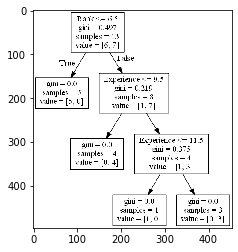

In [7]:
img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

# Result Explained

The decision tree uses your earlier decisions to calculate the odds for you to wanting to go see a comedian or not.

Let us read the different aspects of the decision tree:



# Rank

Rank <= 6.5 means that every comedian with a rank of 6.5 or lower will follow the True arrow (to the left), and the rest will follow the False arrow (to the right).



gini = 0.497 refers to the quality of the split, and is always a number between 0.0 and 0.5, where 0.0 would mean all of the samples got the same result, and 0.5 would mean that the split is done exactly in the middle.



samples = 13 means that there are 13 comedians left at this point in the decision, which is all of them since this is the first step.



value = [6, 7] means that of these 13 comedians, 6 will get a "NO", and 7 will get a "GO".

# Gini

There are many ways to split the samples, we use the GINI method in this tutorial.

The Gini method uses this formula:

### Gini = 1 - (x/n)2 - (y/n)2


Where x is the number of positive answers("GO"), n is the number of samples, and y is the number of negative answers ("NO"), which gives us this calculation:

1 - (7 / 13)2 - (6 / 13)2 = 0.497





The next step contains two boxes, one box for the comedians with a 'Rank' of 6.5 or lower, and one box with the rest.

### True - 5 Comedians End Here:
 gini = 0.0 means all of the samples got the same result.

 samples = 5 means that there are 5 comedians left in this branch (5 comedian with a Rank of 6.5 or lower).

 value = [5, 0] means that 5 will get a "NO" and 0 will get a "GO".

### False - 8 Comedians Continue:
Nationality
Nationality <= 0.5 means that the comedians with a nationality value of less than 0.5 will follow the arrow to the left (which means everyone from the UK, ), and the rest will follow the arrow to the right.

gini = 0.219 means that about 22% of the samples would go in one direction.

samples = 8 means that there are 8 comedians left in this branch (8 comedian with a Rank higher than 6.5).

value = [1, 7] means that of these 8 comedians, 1 will get a "NO" and 7 will get a "GO".





### True - 4 Comedians Continue:
# Age
Age <= 35.5 means that comedians at the age of 35.5 or younger will follow the arrow to the left, and the rest will follow the arrow to the right.

gini = 0.375 means that about 37,5% of the samples would go in one direction.

samples = 4 means that there are 4 comedians left in this branch (4 comedians from the UK).

value = [1, 3] means that of these 4 comedians, 1 will get a "NO" and 3 will get a "GO".

False - 4 Comedians End Here:
gini = 0.0 means all of the samples got the same result.

samples = 4 means that there are 4 comedians left in this branch (4 comedians not from the UK).

value = [0, 4] means that of these 4 comedians, 0 will get a "NO" and 4 will get a "GO".





True - 2 Comedians End Here:
gini = 0.0 means all of the samples got the same result.

samples = 2 means that there are 2 comedians left in this branch (2 comedians at the age 35.5 or younger).

value = [0, 2] means that of these 2 comedians, 0 will get a "NO" and 2 will get a "GO".

False - 2 Comedians Continue:
Experience
Experience <= 9.5 means that comedians with 9.5 years of experience, or less, will follow the arrow to the left, and the rest will follow the arrow to the right.

gini = 0.5 means that 50% of the samples would go in one direction.

samples = 2 means that there are 2 comedians left in this branch (2 comedians older than 35.5).

value = [1, 1] means that of these 2 comedians, 1 will get a "NO" and 1 will get a "GO".





True - 1 Comedian Ends Here:
gini = 0.0 means all of the samples got the same result.

samples = 1 means that there is 1 comedian left in this branch (1 comedian with 9.5 years of experience or less).

value = [0, 1] means that 0 will get a "NO" and 1 will get a "GO".

False - 1 Comedian Ends Here:
gini = 0.0 means all of the samples got the same result.

samples = 1 means that there is 1 comedians left in this branch (1 comedian with more than 9.5 years of experience).

value = [1, 0] means that 1 will get a "NO" and 0 will get a "GO".




# see w3 school decission tree part for better understanding ... :3

In [8]:
print(dtree.predict([[40, 10, 7, 1]]))



[0]
